In [1]:
import pandas as pd 
import glob
import re 
import string
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline
#xml tag locations
tag0 = 0
tag1 = 1 
tag2 = 2
tag3 = 3
tag4 = 4

In [2]:
def dict_build(tags,store,sorted_keys,keyword_list,email='clemson.edu'):
    count = 0
    value = 0 
    for x in range(len(tags)):
                #Store Id, Effective Date, Dollar Amount
                if tags[x] != tags[tag3] and tags[x] != tags[tag4]:
                    try: 
                        store[sorted_keys[x]].append(soup.find(tags[x]).string)
                    except (TypeError,AttributeError): 
                        continue
                elif tags[x] == tags[tag3]: 
                    #User count is stored 
                    try:
                        for e_mails in soup.find_all(tags[tag3]):
                            e_check = e_mails.string
                            if email in e_check:
                                value+=1
                        store[sorted_keys[x]].append(value)
                        value = 0 
                    except (TypeError,AttributeError): 
                        continue
                elif tags[x] == tags[tag4]: 
                    #Keyword check 
                    try:
                        abst = soup.find(tags[tag4]).string
                        regex = re.compile('[%s]' % re.escape(string.punctuation))
                        abs_punc_free = regex.sub(' ', str(abst))
                        abs_word_list = abs_punc_free.split()
                        for words in abs_word_list: 
                            if words in keyword_list:
                                count+=1
                        if count > 0: 
                            store[sorted_keys[x]].append('Found')
                            count = 0 
                        else:
                            store[sorted_keys[x]].append('NOT Found')
                            count = 0 
                    except (TypeError,AttributeError):
                        continue

In [3]:
%%time
    
keyword_list = ['computation', 'compute', 'simulation', 'computational', 'simulate', 'genome',
   'sequence', 'sequencing', 'molecule', 'large scale', 'large-scale', 'massive', 
    'hpc', 'molecular', 'simulations', 'genomic']

#*****Dictionary to set up for DataFrame************
store = {'ID':[],'Date':[],'Dollar_Amount':[],
'Inspector_Count':[],'Data_Word_Check':[]}
sorted_keys = ['ID','Date','Dollar_Amount',
'Inspector_Count','Data_Word_Check']
#***************************************************

tags =['AwardID','AwardEffectiveDate','AwardAmount',
       'EmailAddress','AbstractNarration']
file = glob.glob('20*/*.xml')

p = 0 #check for the existance of clemson email 

email = 'clemson.edu'

    for x in file: 
        with open(x) as file2:
            xml = file2.read()
            soup = BeautifulSoup(xml,'xml') 
            try:
                for e in soup.find_all(tags[tag3]):
                    inspector_email = e.string
                    if email in inspector_email:
                        p+=1 #increment every time a clemson is found in a xml file 
            except (AttributeError,TypeError): 
                continue
            if p > 0:
                p = 0 #set test value back to 0 for next loop
                dict_build(tags,store,sorted_keys,keyword_list,email)
            else:
                continue

CPU times: user 10min 9s, sys: 13.1 s, total: 10min 22s
Wall time: 27min 49s


In [4]:
fund_frame = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in store.items()]))
fund = fund_frame[['ID','Date','Dollar_Amount','Inspector_Count','Data_Word_Check']]
fund.head()

,ID,Date,Dollar_Amount,Inspector_Count,Data_Word_Check
0,0700508,05/15/2007,181746,1,NOT Found
1,0701187,09/01/2007,54999,1,Found
2,0703042,08/29/2006,239397,1,NOT Found
3,0703061,06/15/2007,886886,3,NOT Found
4,0703117,09/01/2007,930238,2,NOT Found


In [5]:
fund

,ID,Date,Dollar_Amount,Inspector_Count,Data_Word_Check
0,0700508,05/15/2007,181746,1,NOT Found
1,0701187,09/01/2007,54999,1,Found
2,0703042,08/29/2006,239397,1,NOT Found
3,0703061,06/15/2007,886886,3,NOT Found
4,0703117,09/01/2007,930238,2,NOT Found
5,0703547,08/01/2007,8250,3,NOT Found
6,0706426,06/01/2007,430000,1,NOT Found
7,0708899,09/01/2007,269786,1,Found
8,0710797,11/01/2006,308168,1,NOT Found
9,0722313,08/01/2007,492845,5,NOT Found


In [6]:
check = fund.loc[fund['Data_Word_Check'] == 'Found']

In [7]:
check

,ID,Date,Dollar_Amount,Inspector_Count,Data_Word_Check
1,0701187,09/01/2007,54999,1,Found
7,0708899,09/01/2007,269786,1,Found
10,0722625,09/01/2007,815286,1,Found
12,0726023,09/01/2007,299954,1,Found
15,0728868,09/01/2007,10000,2,Found
16,0730694,09/01/2007,324999,1,Found
17,0733125,08/01/2007,25000,1,Found
21,0735655,01/01/2008,311740,2,Found
23,0736037,06/01/2007,72999,1,Found
29,0751132,04/15/2008,376000,1,Found


2006      547565.0
2007     9296640.0
2008    14107489.0
2009    48330404.0
2010    26686914.0
2011    25436320.0
2012    22982159.0
2013    14706722.0
2014    27273298.0
2015    22545653.0
2016    26024463.0
2017     1224156.0
Name: Dollar_Amount, dtype: float64


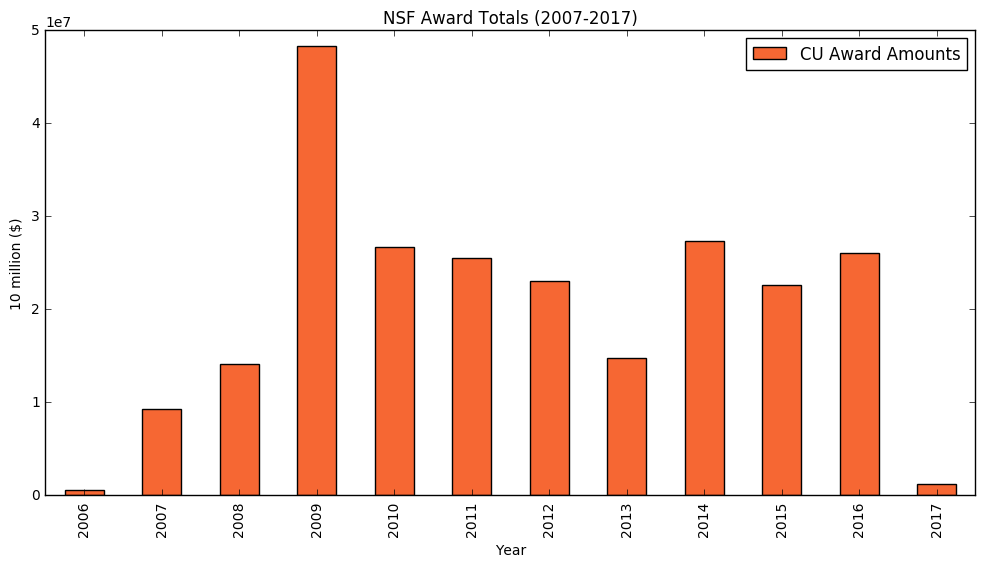

In [8]:
d1 = fund['Dollar_Amount']#series
d1 = d1.astype(float) #type conversion to float
d2 = pd.to_datetime(fund["Date"]) #convert Date to datetime
d1.index = d2 #set d1's index to Date values 
byyear = d1.groupby(d1.index.year).sum() #aggregate the date and sum it
print(byyear)
my_plot = byyear.plot.bar(figsize = (12,6),color='#F66733',legend=True,label='CU Award Amounts')
my_plot.set_title('NSF Award Totals (2007-2017)')
my_plot.set_ylabel('10 million ($)')
my_plot.set_xlabel('Year')

In [9]:
#csv converted to list 
df = pd.read_csv('../Research-Trend/palmetto/palmetto_data/Users.csv') #type = dataframe
user_df_Series = df['LocalUserId'] #type = Series, palmetto user ids 
user_df_list = list(user_df_Series)

In [10]:
%%time 

files = glob.glob('20*/*.xml')
username = [] #The clemson userIDs in the NSF files 
              #length = 802
pal_user_fund = []
test = 0
amount = {'Date':[],'Award_Amount':[]}

for xml_f in files:
#Open files
    with open(xml_f) as new_file:
    #Store Data
        xml = new_file.read()
        #Convert data to text 
        soup = BeautifulSoup(xml,'xml')
        try:
            #loop through the xml file and store all user email
            for e in soup.find_all(tags[tag3]):
                try: 
                    mail = e.string
                    if email in mail:
                        user = e.string.split('@')[0]
                        username.append(user)
                        if user in user_df_list:
                            test+=1
                except (TypeError,AttributeError,IndexError): 
                    continue
        except (TypeError,AttributeError):
            continue
        if test > 0:
            test = 0 
            try:
                amount['Award_Amount'].append(soup.find(tags[tag2]).string)
                amount['Date'].append(soup.find(tags[tag1]).string)
            except (TypeError,AttributeError): 
                continue

CPU times: user 9min 50s, sys: 10.7 s, total: 10min 1s
Wall time: 10min 53s


In [11]:
print(mail)

benhaaland@hotmail.com


In [12]:
print(len(amount['Award_Amount'])) #palmetto users number of award amounts found
print(len(fund['Dollar_Amount']))  #CU users number of award amounts found 

228
548


In [13]:
similar = [userID for userID in username if userID in user_df_list] #length = 282
print('Number of Palmetto usernames: '+ str(len(similar)))
print('Number of total Clemson usernames: '+ str(len(username)))

Number of Palmetto usernames: 292
Number of total Clemson usernames: 852


In [14]:
palmetto = len(similar)
all_users = len(username)

percentage = palmetto/all_users #35%
print("Palmetto Users: "+ str(round(percentage*100)) + '%\n'+'Note: ' + "Value out of total number of Clemson usernames.")

Palmetto Users: 34%
Note: Value out of total number of Clemson usernames.


In [15]:
pal_user_fund = pd.DataFrame(amount) #Dateframe
pal_fund = pal_user_fund[['Date','Award_Amount']] #Dataframe

pal_s = pal_fund['Award_Amount'] #Series
pal_s = pal_s.astype(float) #convert to float

pal2 = pd.to_datetime(pal_fund['Date']) #convert to date type
pal_s.index = pal2 #Set index to date 

g_pal_s = pal_s.groupby(pal_s.index.year).sum()#sum dollar amounts

stack_fund = pd.concat([g_pal_s,byyear],axis=1) #combine series now dataframe

stack_fund.columns = ['CU Awards: Palmetto Users Only','CU Awards']#set column names

stack_fund.index.name = "Year"

      CU Awards: Palmetto Users Only   CU Awards
Year                                            
2006                             0.0    547565.0
2007                       3038007.0   9296640.0
2008                       4594505.0  14107489.0
2009                      12830454.0  48330404.0
2010                      13796148.0  26686914.0
2011                       6061563.0  25436320.0
2012                      15042794.0  22982159.0
2013                       5377191.0  14706722.0
2014                      22436154.0  27273298.0
2015                      12434660.0  22545653.0
2016                      18987197.0  26024463.0
2017                       1071888.0   1224156.0


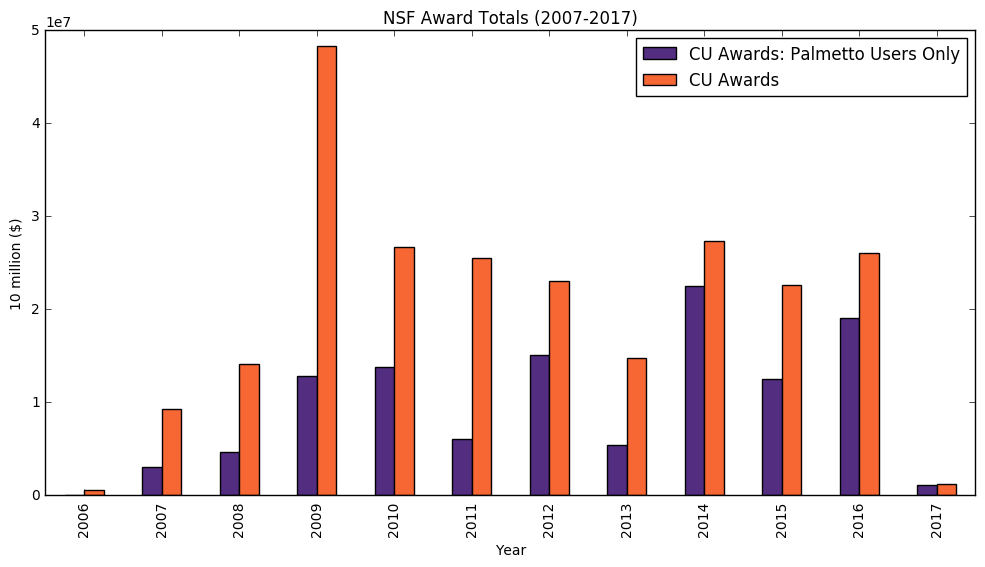

In [17]:
print(stack_fund.fillna(0))

#*****************************Graph Properties**************************************
my_plt = stack_fund.plot.bar(figsize = (12,6),color=['#522D80','#F66733'],legend=True)
my_plt.set_title('NSF Award Totals (2007-2017)')
my_plt.set_ylabel('10 million ($)')
my_plt.set_xlabel('Year')